In [1]:
from nba_api.stats.static import players
player_dict =players.get_players()

In [2]:
BSimmons = [player for player in player_dict if player['full_name'] == 'Ben Simmons'][0]
BSimmons

{'id': 1627732,
 'full_name': 'Ben Simmons',
 'first_name': 'Ben',
 'last_name': 'Simmons',
 'is_active': True}

In [12]:
TYoung = [player for player in player_dict if player['full_name'] == 'Trae Young'][0]
TYoung

{'id': 1629027,
 'full_name': 'Trae Young',
 'first_name': 'Trae',
 'last_name': 'Young',
 'is_active': True}

In [3]:
from nba_api.stats.endpoints import ShotChartDetail

In [13]:
player_id = '1627732' # fill in the player you care about
playoffs_simmons = ShotChartDetail(team_id='0', player_id=player_id, season_type_all_star='Playoffs', season_nullable='2020-21', context_measure_simple='FGA').get_data_frames()[0]

In [19]:
playoffs_simmons.dtypes

GRID_TYPE              object
GAME_ID                object
GAME_EVENT_ID           int64
PLAYER_ID               int64
PLAYER_NAME            object
TEAM_ID                 int64
TEAM_NAME              object
PERIOD                  int64
MINUTES_REMAINING       int64
SECONDS_REMAINING       int64
EVENT_TYPE             object
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
SHOT_ATTEMPTED_FLAG     int64
SHOT_MADE_FLAG          int64
GAME_DATE              object
HTM                    object
VTM                    object
dtype: object

In [20]:
playoffs_simmons['GAME_DATE'] = playoffs_simmons['GAME_DATE'].astype(str).astype(int)

In [22]:
playoffs_simmons.dtypes

GRID_TYPE              object
GAME_ID                object
GAME_EVENT_ID           int64
PLAYER_ID               int64
PLAYER_NAME            object
TEAM_ID                 int64
TEAM_NAME              object
PERIOD                  int64
MINUTES_REMAINING       int64
SECONDS_REMAINING       int64
EVENT_TYPE             object
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
SHOT_ATTEMPTED_FLAG     int64
SHOT_MADE_FLAG          int64
GAME_DATE               int32
HTM                    object
VTM                    object
dtype: object

In [30]:
playoffs_simmons_ATL = playoffs_simmons[(playoffs_simmons['GAME_DATE']>=20210523)]
playoffs_simmons_ATL

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0042000101,11,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,11,8,...,Center(C),Less Than 8 ft.,3,29,11,1,1,20210523,PHI,WAS
1,Shot Chart Detail,0042000101,21,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,10,17,...,Center(C),Less Than 8 ft.,2,16,-13,1,1,20210523,PHI,WAS
2,Shot Chart Detail,0042000101,101,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,4,13,...,Center(C),Less Than 8 ft.,3,3,35,1,0,20210523,PHI,WAS
3,Shot Chart Detail,0042000101,277,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,4,46,...,Center(C),Less Than 8 ft.,7,17,73,1,0,20210523,PHI,WAS
4,Shot Chart Detail,0042000101,302,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,3,19,...,Center(C),Less Than 8 ft.,0,0,0,1,0,20210523,PHI,WAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Shot Chart Detail,0042000206,354,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,8,17,...,Center(C),Less Than 8 ft.,0,8,-1,1,0,20210618,ATL,PHI
91,Shot Chart Detail,0042000207,77,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,4,35,...,Center(C),Less Than 8 ft.,2,20,11,1,0,20210620,PHI,ATL
92,Shot Chart Detail,0042000207,228,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,7,33,...,Center(C),Less Than 8 ft.,0,-5,5,1,1,20210620,PHI,ATL
93,Shot Chart Detail,0042000207,397,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,8,46,...,Center(C),Less Than 8 ft.,7,-17,71,1,0,20210620,PHI,ATL


In [32]:
simmonsSummary =playoffs_simmons_ATL.groupby(['PERIOD'])[['SHOT_ATTEMPTED_FLAG','SHOT_MADE_FLAG']].sum() 
simmonsSummary['perGameAttempt'] = simmonsSummary['SHOT_ATTEMPTED_FLAG'].div(7)
simmonsSummary['perGameMade'] = simmonsSummary['SHOT_MADE_FLAG'].div(7)

In [33]:
simmonsSummary

,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,perGameAttempt,perGameMade
PERIOD,,,,
1,37,24,5.285714,3.428571
2,27,13,3.857143,1.857143
3,25,17,3.571429,2.428571
4,6,5,0.857143,0.714286


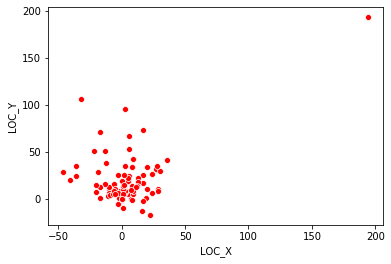

In [11]:
import seaborn as sns
sns.scatterplot(x='LOC_X', y='LOC_Y', data=playoffs_dfs, color='red')

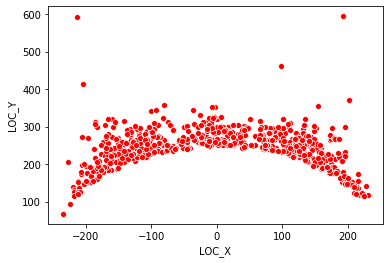

In [163]:
sns.scatterplot(x='LOC_X', y='LOC_Y', data=shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24], color='red')

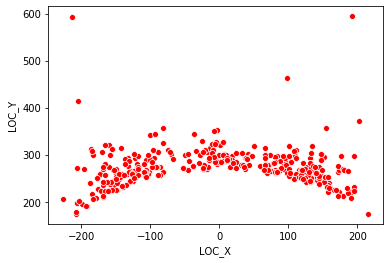

In [164]:
sns.scatterplot(x='LOC_X', y='LOC_Y', data=shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>26], color='red')

In [169]:
shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24].shape[0]

646

In [166]:
shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>26]['SHOT_DISTANCE'].mean()

29.632218844984802

In [170]:
shot_char_detail_dfs.loc[(shot_char_detail_dfs['SHOT_DISTANCE']>=24)&(shot_char_detail_dfs['SHOT_MADE_FLAG']==1)].shape[0]

258

In [171]:
shot_char_detail_dfs.loc[(shot_char_detail_dfs['SHOT_DISTANCE']>=24)&(shot_char_detail_dfs['SHOT_MADE_FLAG']==1)].shape[0] / shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24].shape[0]

0.3993808049535604